<a href="https://colab.research.google.com/github/surakshagp/python-code-2/blob/main/Credit_card_new_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
df=pd.read_csv('/content/CreditCard_DV.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,Existing Customer,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,Existing Customer,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,Existing Customer,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


Text(0.5, 1.0, 'Credit_Limit vs Avg_Purchase')

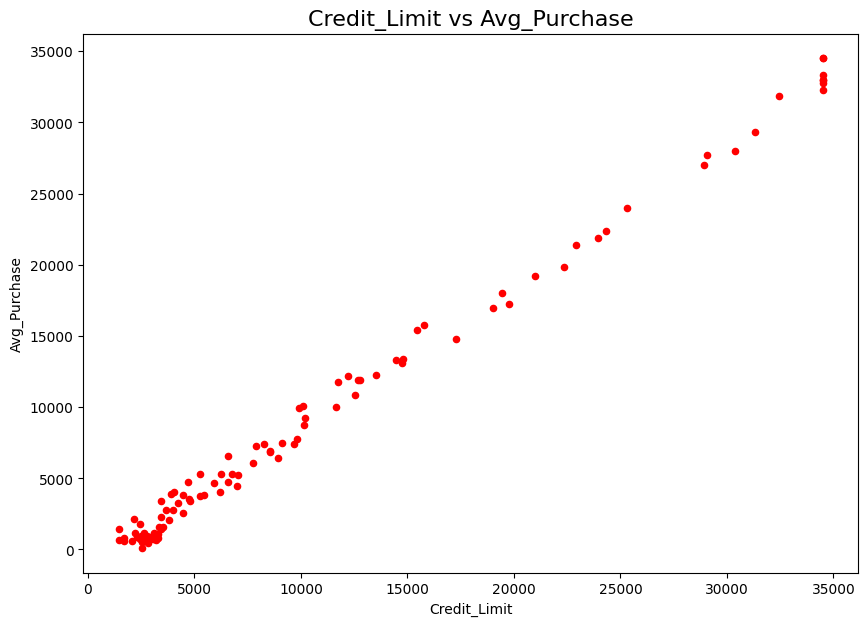

In [ ]:
ax = df.plot("Credit_Limit","Avg_Purchase",kind="scatter", color = "red",marker = "o",figsize=(10,7))
ax.set_xlabel("Credit_Limit")
ax.set_ylabel("Avg_Purchase")
ax.set_title("Credit_Limit vs Avg_Purchase",fontsize=16)

In [ ]:
df["Credit_Limit"].describe()

count      100.000000
mean     10881.756000
std      10056.333148
min       1438.300000
25%       3309.250000
50%       6666.000000
75%      14746.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

Text(0.5, 1.0, 'Credit limit title')

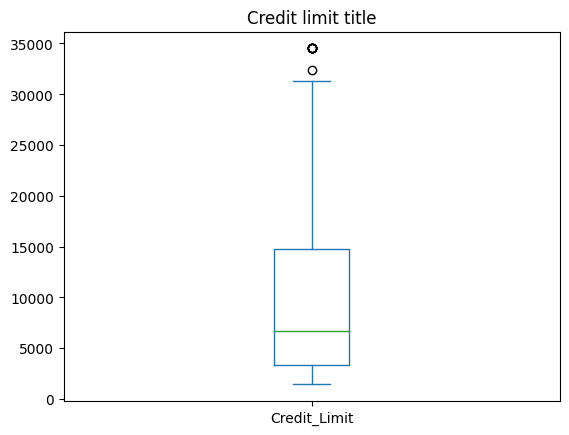

In [ ]:

ax = df["Credit_Limit"].plot(kind="box")
ax.set_title("Credit limit title")

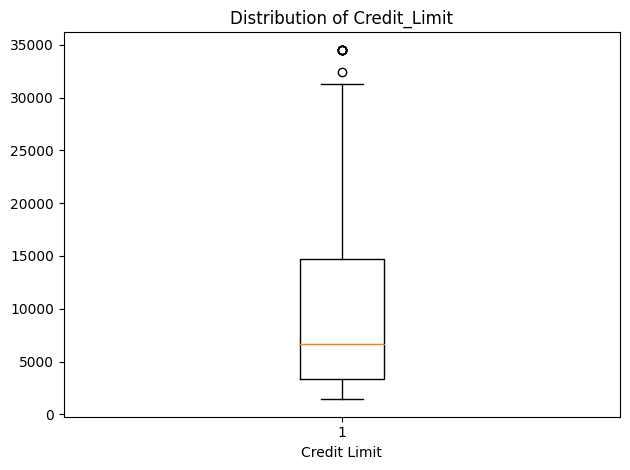

In [ ]:

fig, ax1 = plt.subplots(1, 1)
ax1.boxplot(df["Credit_Limit"])
ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')
fig.tight_layout()

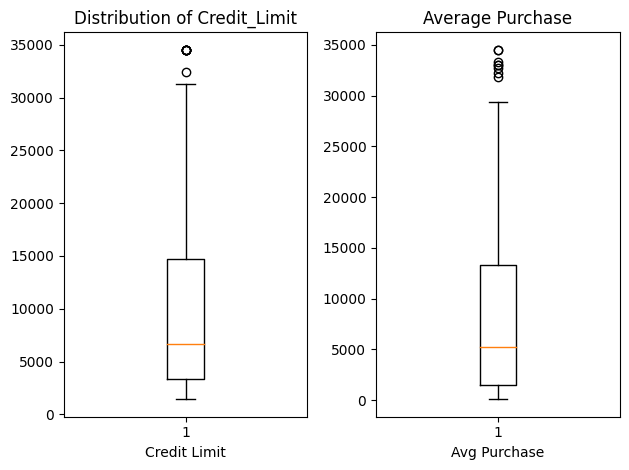

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df["Credit_Limit"])
ax2.boxplot(df["Avg_Purchase"])
ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')
ax2.set_title('Average Purchase')
ax2.set_xlabel("Avg Purchase")
fig.tight_layout()

In [ ]:

cr_limit_arr = df["Credit_Limit"]
q1 = np.quantile(cr_limit_arr, 0.25)
q3 = np.quantile(cr_limit_arr, 0.75)
med = np.median(cr_limit_arr)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR: 11437.25
upper_bound: 31902.375
lower_bound: -13846.625


In [ ]:

outliers = cr_limit_arr[(cr_limit_arr <= lower_bound) | (cr_limit_arr >= upper_bound)]
print('The following are the outliers in the boxplot of Credit Limit:\n',outliers)

The following are the outliers in the boxplot of Credit Limit:
 6     34516.0
40    32426.0
45    34516.0
61    34516.0
65    34516.0
70    34516.0
81    34516.0
84    34516.0
Name: Credit_Limit, dtype: float64


TypeError: ignored

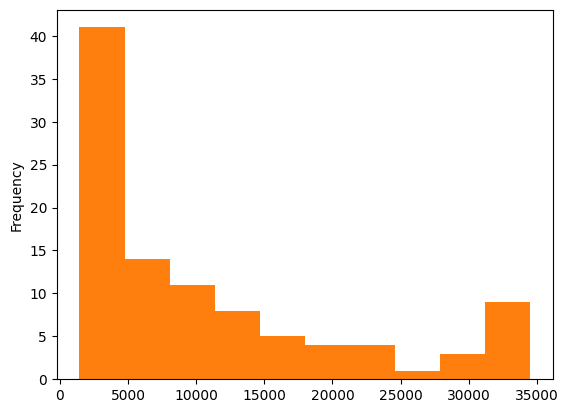

In [25]:

ax = df['Credit_Limit'].plot(kind="hist")
ax = df['Credit_Limit'].plot(kind="hist")
v = ax[(ax == 34516)]
v

In [26]:

avg_purchase = df["Avg_Purchase"]
q1 = np.quantile(avg_purchase, 0.25)
q3 = np.quantile(avg_purchase, 0.75)
med = np.median(avg_purchase)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR: 11790.425
upper_bound: 31022.887499999997
lower_bound: -16138.812499999996


In [27]:

outliers = avg_purchase[(avg_purchase <= lower_bound) | (avg_purchase >= upper_bound)]
print('The following are the outliers in the boxplot of Average Purchase:\n',outliers)

The following are the outliers in the boxplot of Average Purchase:
 6     32252.0
40    31848.0
45    34516.0
61    34516.0
65    33001.0
70    32753.0
81    32983.0
84    33297.0
Name: Avg_Purchase, dtype: float64


In [29]:
categories = df["Income_Category"].unique()
categories

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [30]:

count_df = pd.DataFrame(df[["Income_Category"]].groupby(by= "Income_Category").size().reset_index())
count_df.columns = [["Income_Category","Count"]]
count_df

,Income_Category,Count
0,$120K +,11
1,$40K - $60K,15
2,$60K - $80K,22
3,$80K - $120K,23
4,Less than $40K,22
5,Unknown,7


In [31]:

count_df.set_index('Income_Category', inplace = True)
count_df

,Count
Income_Category,
"($120K +,)",11
"($40K - $60K,)",15
"($60K - $80K,)",22
"($80K - $120K,)",23
"(Less than $40K,)",22
"(Unknown,)",7


Text(0, 0.5, 'Count')

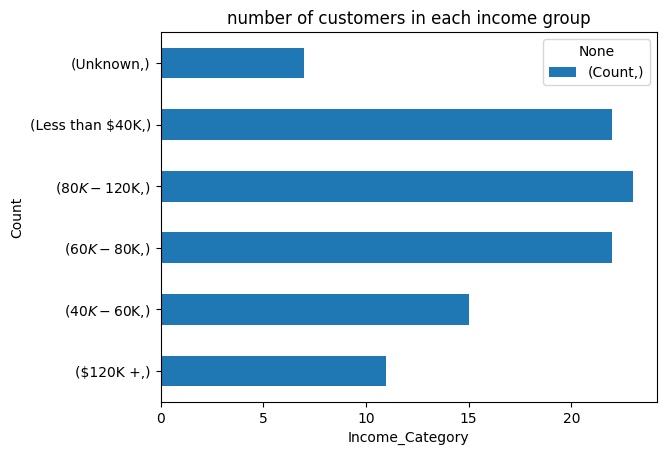

In [32]:

count_df['Count'].plot(kind="barh")
plt.title("number of customers in each income group")
plt.xlabel("Income_Category")
plt.ylabel("Count")

In [34]:
df["Total_Trans_Amt"].min()

602

In [35]:

df["Total_Trans_Amt"].max()

2339

In [36]:
df["Total_Trans_Amt"].max() - df["Total_Trans_Amt"].min()

1737

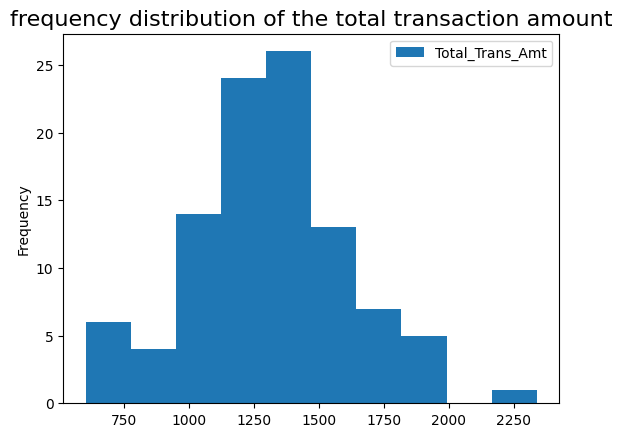

In [37]:

df["Total_Trans_Amt"].plot(kind="hist")
plt.title("frequency distribution of the total transaction amount", fontsize=16)
plt.legend()

In [38]:

Attrition_df= pd.DataFrame(df[["Attrition_Flag"]].groupby(by= ["Attrition_Flag"]).size().reset_index())
Attrition_df.columns = [["Attrition_Flag","Count"]]
Attrition_df

,Attrition_Flag,Count
0,Attrited Customer,7
1,Existing Customer,93


In [39]:

Attrition_df.set_index('Attrition_Flag', inplace = True)
Attrition_df

,Count
Attrition_Flag,
"(Attrited Customer,)",7
"(Existing Customer,)",93


<Axes: ylabel='(Count,)'>

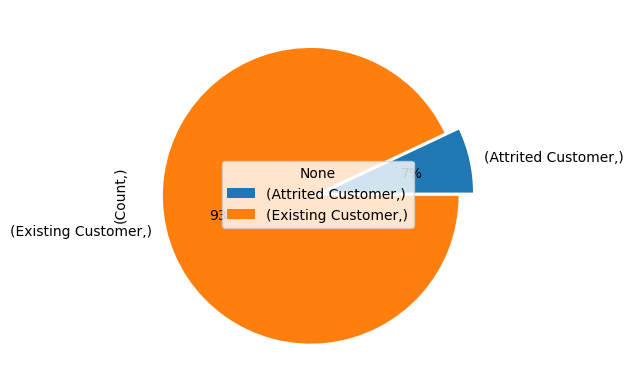

In [40]:

explode = (0.05, 0.05)
Attrition_df.plot(kind='pie', y='Count', autopct='%1.0f%%',explode=explode)